In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [3]:
#Data Sets

In [4]:
cab_data = pd.read_csv('DataSets/Cab_Data.csv')
city_data = pd.read_csv('DataSets/City.csv')
customer_data = pd.read_csv('DataSets/Customer_ID.csv')
transaction_data = pd.read_csv('DataSets/Transaction_ID.csv')

In [5]:
#Cab Data Analysis

In [6]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [7]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [8]:
#City Data

In [9]:
city_data.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [10]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 612.0+ bytes


In [11]:
#Customer Data

In [12]:
customer_data.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [13]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [14]:
#Transaction Data

In [15]:
transaction_data.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [16]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [17]:
#Cab and Transaction

In [18]:
Cab_Transaction = pd.merge(cab_data, transaction_data)

In [19]:
Cab_Transaction.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card


In [20]:
MergedSets = pd.merge(Cab_Transaction, customer_data)

In [21]:
#Fix Date

In [22]:
a = MergedSets['Date of Travel'].to_list()
base_date = pd.Timestamp('1899-12-29')
dates = [base_date + pd.DateOffset(date_offset) for date_offset in a]
MergedSets['Date of Travel'] = pd.to_datetime(dates, format='%y/%m/%d')


In [23]:
MergedSets.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813
1,10351127,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813
2,10412921,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813
3,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237
4,10320494,2018-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237


In [24]:
MergedSets['Profit'] = MergedSets['Price Charged'] - MergedSets['Cost of Trip']

PinkCab = MergedSets[MergedSets['Company']=='Pink Cab']
YellowCab = MergedSets[MergedSets['Company']=='Yellow Cab']

In [25]:
MergedSets.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Profit
count,3.593920e+05,359392,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,2017-08-16 01:37:55.042293504,22.567254,423.443311,286.190113,19191.652115,35.336705,15048.822937,137.253198
min,1.000001e+07,2016-01-01 00:00:00,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000,-220.060000
25%,1.011081e+07,2016-11-22 00:00:00,12.000000,206.437500,151.200000,2705.000000,25.000000,8424.000000,28.012000
50%,1.022104e+07,2017-09-09 00:00:00,22.440000,386.360000,282.480000,7459.000000,33.000000,14685.000000,81.962000
75%,1.033094e+07,2018-05-11 00:00:00,32.960000,583.660000,413.683200,36078.000000,42.000000,21035.000000,190.030000
max,1.044011e+07,2018-12-30 00:00:00,48.000000,2048.030000,691.200000,60000.000000,65.000000,35000.000000,1463.966000
std,1.268058e+05,NaN,12.233526,274.378911,157.993661,21012.412463,12.594234,7969.409482,160.311840


In [26]:
PinkCab.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Profit
count,8.471100e+04,84711,84711.000000,84711.000000,84711.000000,84711.000000,84711.000000,84711.000000,84711.000000
mean,1.022394e+07,2017-08-27 04:24:08.822466816,22.559917,310.800856,248.148682,18422.581577,35.322414,15059.047137,62.652174
min,1.000001e+07,2016-01-01 00:00:00,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000,-220.060000
25%,1.011014e+07,2016-11-25 00:00:00,12.000000,159.970000,131.868000,5317.500000,25.000000,8371.000000,11.206000
50%,1.022590e+07,2017-09-21 00:00:00,22.440000,298.060000,246.330000,8876.000000,33.000000,14713.000000,41.500000
75%,1.033642e+07,2018-05-31 00:00:00,32.960000,441.505000,360.180000,27190.000000,42.000000,21055.000000,93.965000
max,1.043762e+07,2018-12-30 00:00:00,48.000000,1623.480000,576.000000,60000.000000,65.000000,35000.000000,1119.480000
std,1.261782e+05,NaN,12.231092,181.995661,135.403345,18084.830799,12.644780,7991.077762,77.590378


In [27]:
YellowCab.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Profit
count,2.746810e+05,274681,274681.000000,274681.000000,274681.000000,274681.000000,274681.000000,274681.000000,274681.000000
mean,1.021978e+07,2017-08-12 15:21:37.937607680,22.569517,458.181990,297.922004,19428.831732,35.341112,15045.669817,160.259986
min,1.000038e+07,2016-01-01 00:00:00,1.900000,20.730000,22.800000,1.000000,18.000000,2000.000000,-176.930800
25%,1.011084e+07,2016-11-20 00:00:00,11.990000,226.680000,158.400000,2403.000000,25.000000,8439.000000,37.180000
50%,1.021987e+07,2017-09-05 00:00:00,22.440000,425.060000,295.596000,6445.000000,33.000000,14676.000000,102.000000
75%,1.032939e+07,2018-05-04 00:00:00,32.960000,633.880000,432.432000,38916.000000,42.000000,21023.000000,228.670400
max,1.044011e+07,2018-12-30 00:00:00,48.000000,2048.030000,691.200000,60000.000000,65.000000,34996.000000,1463.966000
std,1.269829e+05,NaN,12.234298,288.386166,162.548986,21830.791423,12.578625,7962.727062,171.823833


In [28]:
PinkNum = len(MergedSets[MergedSets["Company"]=="Pink Cab"])
YellowNum = len(MergedSets[MergedSets["Company"]=="Yellow Cab"])

CardPayment =  len(MergedSets[MergedSets["Payment_Mode"]=="Card"])
CashPayment =  len(MergedSets[MergedSets["Payment_Mode"]=="Cash"])

FemaleDist = len(MergedSets[MergedSets["Gender"]=="Female"])
MaleDist = len(MergedSets[MergedSets["Gender"]=="Male"])

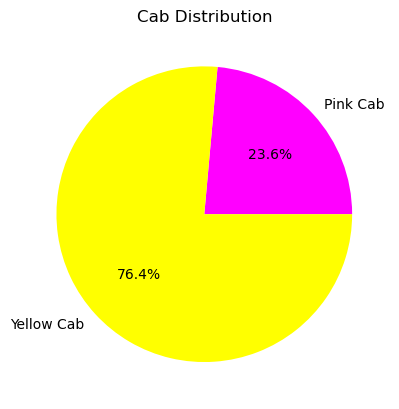

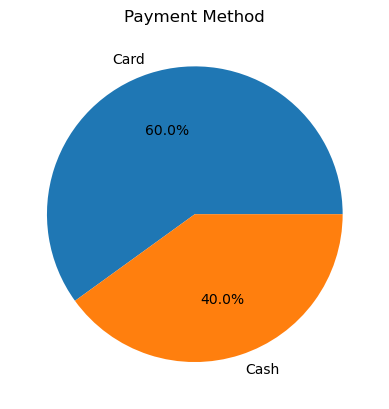

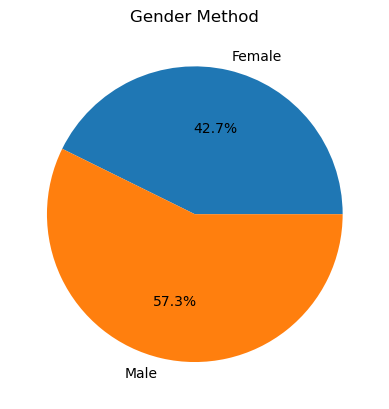

In [29]:
CabMarketShare = np.array([PinkNum, YellowNum])
mylabels = ["Pink Cab", "Yellow Cab"]
mycolors = ["magenta", "yellow"]

plt.pie(CabMarketShare, labels = mylabels, colors = mycolors, autopct="%1.1f%%")
plt.title("Cab Distribution")
plt.savefig('CabDist.png')
plt.show() 

PaymentDistribution = np.array([CardPayment, CashPayment])
mylabels = ["Card" , "Cash"]

plt.pie(PaymentDistribution, labels = mylabels, autopct="%1.1f%%")
plt.title("Payment Method")
plt.savefig('PaymentDist.png')
plt.show()
           

GenderDistribution = np.array([FemaleDist, MaleDist])
mylabels = ["Female" , "Male"]
          
plt.pie(GenderDistribution, labels = mylabels, autopct="%1.1f%%")
plt.title("Gender Method")
plt.savefig('GenDist.png')
plt.show()

In [30]:
def convert(list1, list2):
    result = []
    for x,y in zip(list1, list2):
        result.append((x,y))
    return result
        

[('NEW YORK NY', 99885), ('CHICAGO IL', 56625), ('LOS ANGELES CA', 48033), ('WASHINGTON DC', 43737), ('BOSTON MA', 29692), ('SAN DIEGO CA', 20488), ('SILICON VALLEY', 8519), ('SEATTLE WA', 7997), ('ATLANTA GA', 7557), ('DALLAS TX', 7017), ('MIAMI FL', 6454), ('AUSTIN TX', 4896), ('ORANGE COUNTY', 3982), ('DENVER CO', 3825), ('NASHVILLE TN', 3010), ('SACRAMENTO CA', 2367), ('PHOENIX AZ', 2064), ('TUCSON AZ', 1931), ('PITTSBURGH PA', 1313)]
[('LOS ANGELES CA', 19865), ('NEW YORK NY', 13967), ('SAN DIEGO CA', 10672), ('CHICAGO IL', 9361), ('BOSTON MA', 5186), ('SILICON VALLEY', 3797), ('WASHINGTON DC', 3692), ('SEATTLE WA', 2732), ('MIAMI FL', 2002), ('AUSTIN TX', 1868), ('NASHVILLE TN', 1841), ('ATLANTA GA', 1762), ('ORANGE COUNTY', 1513), ('DENVER CO', 1394), ('DALLAS TX', 1380), ('SACRAMENTO CA', 1334), ('PHOENIX AZ', 864), ('TUCSON AZ', 799), ('PITTSBURGH PA', 682)]


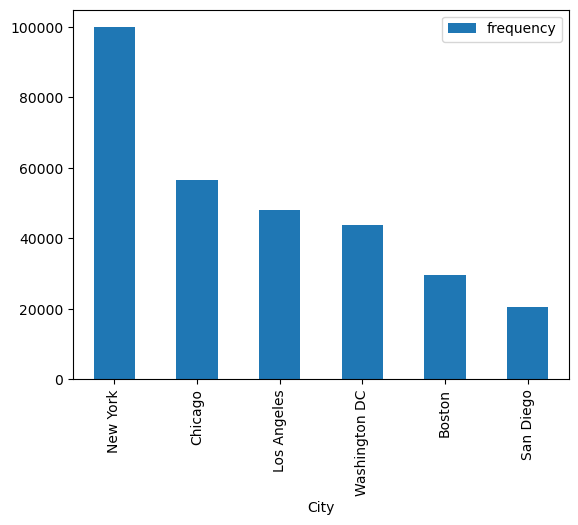

In [67]:
#Frequency of Cities
city_array = np.array(MergedSets['City'])

unique, frequency = np.unique(city_array, return_counts = True)

tup = convert(unique, frequency)
tup.sort(key = lambda x: x[1], reverse = True) 
print(tup)

#Looking at top 6 cities, 6 instead of 5 because Boston and San Diego are close in frequencies

CitiesFrq = [('New York', 99885), ('Chicago', 56625), ('Los Angeles', 48033), ('Washington DC', 43737), ('Boston', 29692), ('San Diego', 20488)] 

df = pd.DataFrame(CitiesFrq, columns=['City', 'frequency'])
df.plot(kind='bar', x='City',)
plt.savefig('CityDist.png')


[('LOS ANGELES CA', 19865), ('NEW YORK NY', 13967), ('SAN DIEGO CA', 10672), ('CHICAGO IL', 9361), ('BOSTON MA', 5186), ('SILICON VALLEY', 3797), ('WASHINGTON DC', 3692), ('SEATTLE WA', 2732), ('MIAMI FL', 2002), ('AUSTIN TX', 1868), ('NASHVILLE TN', 1841), ('ATLANTA GA', 1762), ('ORANGE COUNTY', 1513), ('DENVER CO', 1394), ('DALLAS TX', 1380), ('SACRAMENTO CA', 1334), ('PHOENIX AZ', 864), ('TUCSON AZ', 799), ('PITTSBURGH PA', 682)]


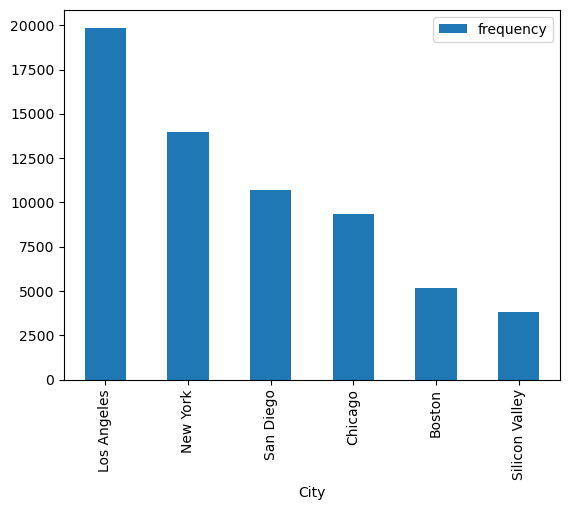

In [73]:
#Frequency between Cabs (Pink)

city_array = np.array(PinkCab['City'])

unique, frequency = np.unique(city_array, return_counts = True)

tup = convert(unique, frequency)
tup.sort(key = lambda x: x[1], reverse = True) 
print(tup)

#Looking at top 6 cities,

CitiesFrq = [('Los Angeles', 19865), ('New York', 13967), ('San Diego', 10672), ('Chicago', 9361), ('Boston', 5186), ('Silicon Valley', 3797)] 

df = pd.DataFrame(CitiesFrq, columns=['City', 'frequency'])
df.plot(kind='bar', x='City',)
plt.savefig('PinkCityDist.png')

[('NEW YORK NY', 85918), ('CHICAGO IL', 47264), ('WASHINGTON DC', 40045), ('LOS ANGELES CA', 28168), ('BOSTON MA', 24506), ('SAN DIEGO CA', 9816), ('ATLANTA GA', 5795), ('DALLAS TX', 5637), ('SEATTLE WA', 5265), ('SILICON VALLEY', 4722), ('MIAMI FL', 4452), ('AUSTIN TX', 3028), ('ORANGE COUNTY', 2469), ('DENVER CO', 2431), ('PHOENIX AZ', 1200), ('NASHVILLE TN', 1169), ('TUCSON AZ', 1132), ('SACRAMENTO CA', 1033), ('PITTSBURGH PA', 631)]


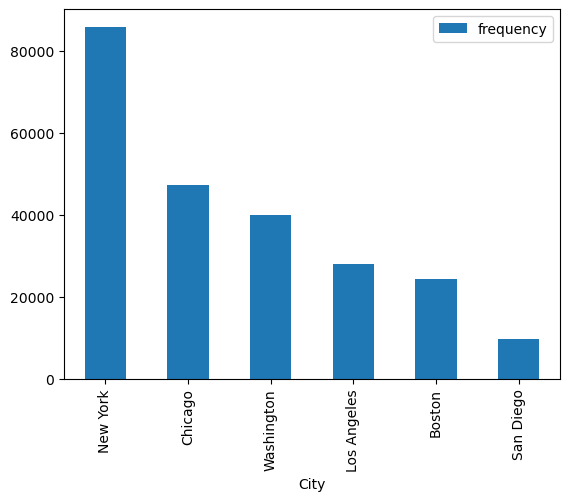

In [77]:
#Frequency between Cabs (Yellow)

city_array = np.array(YellowCab['City'])

unique, frequency = np.unique(city_array, return_counts = True)

tup = convert(unique, frequency)
tup.sort(key = lambda x: x[1], reverse = True) 
print(tup)

#Looking at top 6 cities,

CitiesFrq = [('New York', 85918), ('Chicago', 47264), ('Washington', 40045), ('Los Angeles', 28168), ('Boston', 24506), ('San Diego', 9816)] 

df = pd.DataFrame(CitiesFrq, columns=['City', 'frequency'])
df.plot(kind='bar', x='City',)
plt.savefig('YellowCityDist.png')

In [32]:
#Data Between Cabs

In [33]:
'''
Analysis

Yellow Cab three times the amount of buisness than Pink Cabs
For both cab companies, most of their clientele are from the most populated major cities in the United States.
This is expected, the Yellow Cab company has most of their buisness in the most populated cities, while the Pink cab operates more in the less populated cities. This could be the cause of the Yellow Cab company having so many more clients.

The average age from both companies is 35 years and the average monthly income is 15,000.
The average income in the US is currently around 5000 per month. The large difference between the average income from people using the Cab service compared to the average in the United States may be due to the cabs operating in major cities which has a higher cost of living and higher salaries on average.
Another reason for the higher average income may be because using a cab compared to any other form of transportation in a City is a luxury. In cities, there are many cheaper alternative forms of transportations that someone with a lower salary would be more inclined to use over a cab ride. The customers studied in these data sets may be more likely to have higher salaries than the average just based on the type of transportation that they frequent.

Based on the data, there's also a slight prefrence for using card over cash as a payment method. This makes sense and is in line with recent US trends and consumers paying with card over cash.

'''

"\nAnalysis\n\nYellow Cab three times the amount of buisness than Pink Cabs\nFor both cab companies, most of their clientele are from the most populated major cities in the United States.\nThis is expected, the Yellow Cab company has most of their buisness in the most populated cities, while the Pink cab operates more in the less populated cities. This could be the cause of the Yellow Cab company having so many more clients.\n\nThe average age from both companies is 35 years and the average monthly income is 15,000.\nThe average income in the US is currently around 5000 per month. The large difference between the average income from people using the Cab service compared to the average in the United States may be due to the cabs operating in major cities which has a higher cost of living and higher salaries on average.\nAnother reason for the higher average income may be because using a cab compared to any other form of transportation in a City is a luxury. In cities, there are many che